# <div style="text-align: center; background-color: #128E53; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">🌍EDA on World Population Dataset</div>

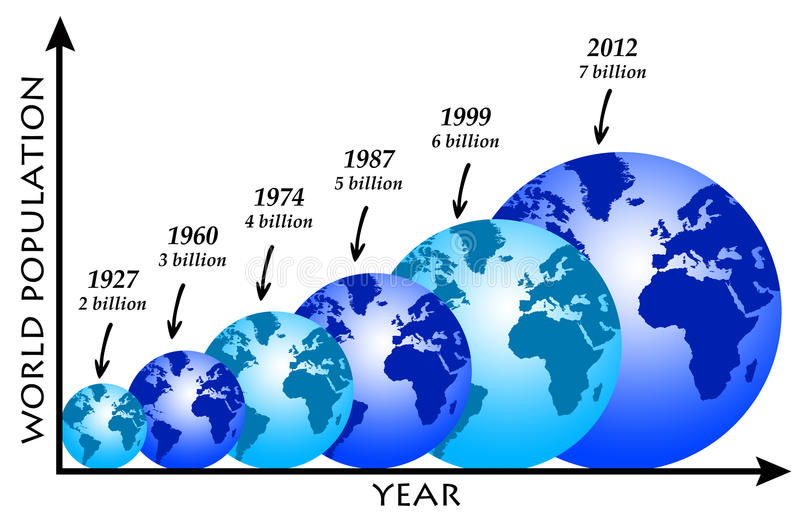

<h3 style="text-align: left; background-color: #128E53; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Notebook Objectives🔎</h3>

<h4>Goal of the notebook is to:</h4> 

1. 📊Explore <b><mark>every feature</mark></b> in the dataset; <br>

2. 🎏<b><mark>Country Analysis</mark></b>(with <b>Rank, Continent</b>);<br>

3. 📝<b><mark>Years Analysis</mark></b> (with <b>2022 Population, 2020 Population etc.</b>);

4. 📈<b><mark>Population Analysis</mark></b> (with <b>Growth Rate, World Population</b>)

<a id="1"></a>
# <div style="text-align: center; background-color: #128E53; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px">1. Import Necessary Libraries</div>

<h4> First, import necessary libraries below: </h4>

In [1]:
!pip install country_converter
# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for country_converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=c4599e1bfe3a18c5aeea7f43b03162bedc06d2922da36c3dd13244c5852161ac
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country_converter


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = pd.read_csv('../input/world-population-dataset/world_population.csv')
df.drop(df[['Capital','Rank','CCA3']], axis=1, inplace=True)
df.head()

,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [3]:
print(df.shape)

(234, 14)


We have 234 line and 14 column

<a id="2"></a>
# <div style="text-align: center; background-color: #128E53; font-family:newtimeroman; color: white; padding: 14px; line-height: 1;border-radius:20px"> 2. Univariate Analysis🌍 (explore each columns)</div>

<h4>In this section, we'll explore each columns in the dataset to see the distributions of features, and to get some useful informations.</h4>
<h4> Mainly two parts in the section: Analysis on categorical columns; Analysis on numeric columns.<h4>

<a id="2.1"></a>
## <div style="text-align: left; background-color:#128E53; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">2.1. Categorical Columns</div>

<h4>Only 2 categorical column in the dataset:</h4><br>

* Continent
* Country

<a id="2.1.1"></a>
### <div style="text-align: left; background-color:#128E53; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.1.1. Continent</div>

<h4>There's 6 categorical values  in column 'Continent' each are: </h4><br>
<b>Africa</b> <br>
<b>Asia</b> <br>
<b>Europe</b> <br>
<b>North America</b> <br>
<b>Oceania</b> <br>
<b>South America</b> <br>

<b><u><mark>Africe</mark></u>, <u><mark>Asia</mark></u> and <u><mark>Europe</mark></u> ranked top 3 frequent continents, but it can be easily seen that others are also related to <u>those top 3 continents</u>.</b>

We'll analyse the population of each country and continent for decades.Countries and continents by plotting map & bar charts in this section.

In [4]:
country_count = df['Continent'].value_counts()
fig = px.bar(y=country_count.values, 
             x=country_count.index, 
             color = country_count.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=country_count.values,
             title= 'Number of Countries By Continent',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Count",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

In [5]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='2022 Population',  # we indicate the year we are interested in
                    hover_name='Country',
                    template='plotly_dark',
                    title = '2022 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [6]:
sum_2022_pop = df.groupby(by = 'Continent')['2022 Population'].sum()
fig = px.pie(values=sum_2022_pop.values, 
             names=sum_2022_pop.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Population Ratio And Count By Continent (2022)',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

<b> As can be seen in the graphic, the Asian continent alone constitutes more than <mark>55<mark> percent of the world's population in 2022. <b>.<br>


In [7]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='2010 Population',  # we indicate the year we are interested in
                    hover_name='Country',
                    template='plotly_dark',
                    title = '2010 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [8]:
sum_2010_pop = df.groupby(by = 'Continent')['2010 Population'].sum()
fig = px.pie(values=sum_2010_pop.values, 
             names=sum_2010_pop.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Population Ratio And Count By Continent (2010)',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

In [9]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='2000 Population',  # we indicate the year we are interested in
                    hover_name='Country',
                    template='plotly_dark',
                    title = '2000 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [10]:
sum_2000_pop = df.groupby(by = 'Continent')['2000 Population'].sum()
fig = px.pie(values=sum_2000_pop.values, 
             names=sum_2000_pop.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Population Ratio And Count By Continent (2000)',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

In [11]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='1980 Population',  # we indicate the year we are interested in
                    hover_name='Country',
                    template='plotly_dark',
                    title = '1980 Population',
                    color_continuous_scale='Viridis'
                    )
fig.show()

In [12]:
sum_1980_pop = df.groupby(by = 'Continent')['1980 Population'].sum()
fig = px.pie(values=sum_1980_pop.values, 
             names=sum_1980_pop.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Population Ratio And Count By Continent (1980)',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

<h3 style="text-align: left; background-color: #128E53; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Insights About Continent Variable🔎</h3>

**Although the population has increased over the past 10 years, there has not been a great change in the continents in percentage.**

**Asia, Africa and Europe alone constitute more than 80 percent of the world's population.**

<a id="2.1.2"></a>
### <div style="text-align: left; background-color:#128E53; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:5px">2.1.2. Country</div>

In [13]:
sum_country_2022 = df.groupby(by = 'Country')['2022 Population'].sum().sort_values(ascending=False).head(8)
fig = px.bar(y=sum_country_2022.values, 
             x=sum_country_2022.index, 
             color = sum_country_2022.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=sum_country_2022.values,
             title= 'Number of People By Countries (2022)',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

In [14]:
sum_country_2010 = df.groupby(by = 'Country')['2010 Population'].sum().sort_values(ascending=False).head(8)
fig = px.bar(y=sum_country_2010.values, 
             x=sum_country_2010.index, 
             color = sum_country_2010.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=sum_country_2010.values,
             title= 'Number of People By Countries (2010)',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

In [15]:
sum_country_2000 = df.groupby(by = 'Country')['2000 Population'].sum().sort_values(ascending=False).head(8)
fig = px.bar(y=sum_country_2000.values, 
             x=sum_country_2000.index, 
             color = sum_country_2000.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=sum_country_2000.values,
             title= 'Number of People By Countries (2000)',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

In [16]:
sum_country_1980 = df.groupby(by = 'Country')['1980 Population'].sum().sort_values(ascending=False).head(8)
fig = px.bar(y=sum_country_1980.values, 
             x=sum_country_1980.index, 
             color = sum_country_1980.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=sum_country_1980.values,
             title= 'Number of People By Countries (1980)',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

In [17]:
rat_country_pie = (df.groupby(by = 'Country')['2022 Population'].sum() / df['2022 Population'].sum()).sort_values(ascending=False).head(8)
fig = px.pie(values=rat_country_pie.values, 
             names=rat_country_pie.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Population Ratio And Count By Country (2022)',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

In [18]:
rat_country_pie2 = (df.groupby(by = 'Country')['1980 Population'].sum() / df['1980 Population'].sum()).sort_values(ascending=False).head(8)
fig = px.pie(values=rat_country_pie2.values, 
             names=rat_country_pie2.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= 'Population Ratio And Count By Country (1980)',template='plotly_dark')
fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.update_layout(
    font=dict(size=20,family="Franklin Gothic"))
fig.show()

### <div style="text-align: left; background-color:#128E53; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:5px">Population Growth</div>

In [19]:
pop_diff = ((df.groupby(by = 'Country')['2022 Population'].sum()) - (df.groupby(by = 'Country')['1980 Population'].sum())).sort_values(ascending=False).head(8)
fig = px.bar(y=pop_diff.values, 
             x=pop_diff.index, 
             color = pop_diff.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=pop_diff.values,
             title= 'Population Growth in 40 Years',
             template= 'plotly_dark')
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=15,family="Franklin Gothic"))
fig.show()

<h3 style="text-align: left; background-color: #128E53; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Insights About Country Variable🔎</h3>

**In 2022 and in 1980 India and China alone constitute more than 65 percent of the world's population.**

**India,China ad Pakistan most growth countries in 40 year.**

<a id="2.2"></a>
## <div style="text-align: left; background-color:#128E53; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">2.2. Numerical Columns</div>

<h4>Only 2 numerical column in the dataset we are going to review:</h4><br>

* Area
* Density Per KM

In [20]:
area_country = df.groupby(by = 'Country')['Area (km²)'].sum().sort_values(ascending=False).head()
fig = px.bar(y=area_country.values, 
             x=area_country.index, 
             color = area_country.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=area_country.values,
             title= 'Top 5 Biggest Countries',
             )
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=20,family="Franklin Gothic"))
fig.show()

In [21]:
area_country_2 = df.groupby(by = 'Country')['Area (km²)'].sum().sort_values(ascending=True).head()
fig = px.bar(y=area_country_2.values, 
             x=area_country_2.index, 
             color = area_country_2.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=area_country_2.values,
             title= 'Top 5 Smallest Countries',
             )
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=20,family="Franklin Gothic"))
fig.show()

In [22]:
m2_per_pop = ((df.groupby(by = 'Country')['2022 Population'].sum()) - 
              (df.groupby(by ='Country')['Area (km²)'].sum())).sort_values(ascending=False).head()
fig = px.bar(y=m2_per_pop.values, 
             x=m2_per_pop.index, 
             color = m2_per_pop.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=m2_per_pop.values,
             title= 'Top 5 Countries Km^2 Per Population',
             )
fig.update_layout(
    xaxis_title="Countries",
    yaxis_title="Population",
    font = dict(size=20,family="Franklin Gothic"))
fig.show()

<h3 style="text-align: left; background-color: #128E53; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Insights About Numeric Variable🔎</h3>

**As we see Russia by far biggest country in the world.**

**If we look at the side of data density per population China and India too much crowded than the other countries.**

<h3 style="text-align: left; background-color: #128E53; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"> Growth Rate</h3>

In [23]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='2022 Population',
                    hover_name='Country',                    
                    title = 'Growth Rate',
                    color_continuous_scale='Viridis'
                    )
fig.show()

<h3 style="text-align: left; background-color: #128A83; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px">If you liked this notebook please upvote 🏆</h3>